# To study agricultural crop yield prediction in Maharashtra

# Dataset
 The dataset includes information about:
 - Crop: The name of the crop cultivated.
 - Crop_Year: The year in which the crop was grown.
 - Season: The specific cropping season (e.g., Kharif, Rabi, Whole Year).
 - State: The Indian state where the crop was cultivated.
 - Area: The total land area (in hectares) under cultivation for the specific crop.
 - Production: The quantity of crop production (in metric tons).
 - Annual_Rainfall: The annual rainfall received in the crop-growing region (in mm).
 - Fertilizer: The total amount of fertilizer used for the crop (in kilograms).
 - Pesticide: The total amount of pesticide used for the crop (in kilograms).
 - Yield: The calculated crop yield (production per unit area).

# Objectives:
 - Finding best fit model to the dataset.
 - Analysis of different features in the dataset.
 - Prediction of agriculture crop yield.

# Summary:
This project aims to analyze and predict the agriculture crop yield prediction .The dataset is available on Kaggle but that dataset is of India includes all states but in this project I take dataset only for Maharashtra state.The overall goal of an agriculture crop yield prediction project is to empower farmers and decision-makers with insights that can optimize agricultural practices, improve resource utilization, and mitigate potential crop losses.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("data set maharashtra.csv")

In [3]:
data

State  Crop_Year            Crop       Season       Area  \
0    Maharashtra       1997       Arhar/Tur  Kharif       1005600.0   
1    Maharashtra       1997           Bajra  Kharif       1671200.0   
2    Maharashtra       1997    Cotton(lint)  Whole Year     31292.0   
3    Maharashtra       1997            Gram  Kharif        717100.0   
4    Maharashtra       1997           Jowar  Kharif       2013200.0   
..           ...        ...             ...          ...        ...   
765  Maharashtra       2019            Urad  Kharif        340529.0   
766  Maharashtra       2019           Wheat  Rabi         1056965.0   
767  Maharashtra       2019  other oilseeds  Kharif         10634.0   
768  Maharashtra       2019  other oilseeds  Rabi           10517.0   
769  Maharashtra       2019  other oilseeds  Summer          1276.0   

     Production  Annual_Rainfall    Fertilizer  Pesticide      Yield  
0        348000           1156.1  9.570295e+07  311736.00   0.332500  
1       1119000           1156.1  1.590481e+08  518072.00   0.632273  
2       1753100           1156.1  2.978060e+06    9700.52  95.993913  
3        295900           1156.1  6.824641e+07  222301.00   0.408148  
4       2632300           1156.1  1.915962e+08  624092.00   1.646800  
..          ...              ...           ...        ...        ...  
765      151195           1555.8  5.848926e+07  125995.73   0.456250  
766     1793440           1555.8  1.815443e+08  391077.05   1.564000  
767        3249           1555.8  1.826496e+06    3934.58   0.271364  
768        3231           1555.8  1.806400e+06    3891.29   0.379667  
769         686           1555.8  2.191658e+05     472.12   0.362500  

[770 rows x 10 columns]

In [4]:
#checking rows and columns in data
data.shape

(770, 10)

In [5]:
#checking null values in data
data.isnull().sum() 

State              0
Crop_Year          0
Crop               0
Season             0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            770 non-null    object 
 1   Crop_Year        770 non-null    int64  
 2   Crop             770 non-null    object 
 3   Season           770 non-null    object 
 4   Area             770 non-null    float64
 5   Production       770 non-null    int64  
 6   Annual_Rainfall  770 non-null    float64
 7   Fertilizer       770 non-null    float64
 8   Pesticide        770 non-null    float64
 9   Yield            770 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 60.3+ KB


In [7]:
#checking duplicate values in data
data.duplicated().sum()

0

In [8]:
category_columns = data.select_dtypes(include = ['object']).columns
category_columns

Index(['State', 'Crop', 'Season'], dtype='object')

In [9]:
data.describe()

Crop_Year          Area    Production  Annual_Rainfall    Fertilizer  \
count   770.000000  7.700000e+02  7.700000e+02       770.000000  7.700000e+02   
mean   2008.492208  5.999215e+05  2.439695e+06      1176.195779  8.102476e+07   
std       6.593772  9.295266e+05  1.110188e+07       183.354331  1.332339e+08   
min    1997.000000  2.100000e+01  1.500000e+01       875.700000  1.998570e+03   
25%    2003.000000  2.955000e+04  1.455000e+04      1035.800000  4.473904e+06   
50%    2009.000000  1.337610e+05  1.114500e+05      1151.100000  1.743337e+07   
75%    2014.000000  8.030000e+05  9.172000e+05      1387.200000  1.103639e+08   
max    2019.000000  4.491331e+06  9.153810e+07      1555.800000  7.714310e+08   

          Pesticide       Yield  
count  7.700000e+02  770.000000  
mean   1.619331e+05    4.401030  
std    2.709054e+05   37.677866  
min    6.510000e+00    0.047600  
25%    8.165250e+03    0.419799  
50%    3.478800e+04    0.666884  
75%    2.134849e+05    1.259074  
max    1.661792e+06  989.870000

In [10]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                 Crop_Year      Area  Production  Annual_Rainfall  Fertilizer  \
Crop_Year         1.000000 -0.008493    0.038724         0.208758    0.098965   
Area             -0.008493  1.000000    0.135570         0.015447    0.976817   
Production        0.038724  0.135570    1.000000         0.019477    0.145438   
Annual_Rainfall   0.208758  0.015447    0.019477         1.000000    0.043568   
Fertilizer        0.098965  0.976817    0.145438         0.043568    1.000000   
Pesticide         0.069059  0.955198    0.134418         0.028491    0.955577   
Yield            -0.067397 -0.012215    0.288527        -0.003753   -0.009508   

                 Pesticide     Yield  
Crop_Year         0.069059 -0.067397  
Area              0.955198 -0.012215  
Production        0.134418  0.288527  
Annual_Rainfall   0.028491 -0.003753  
Fertilizer        0.955577 -0.009508  
Pesticide         1.000000 -0.010581  
Yield            -0.010581  1.000000  


# Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

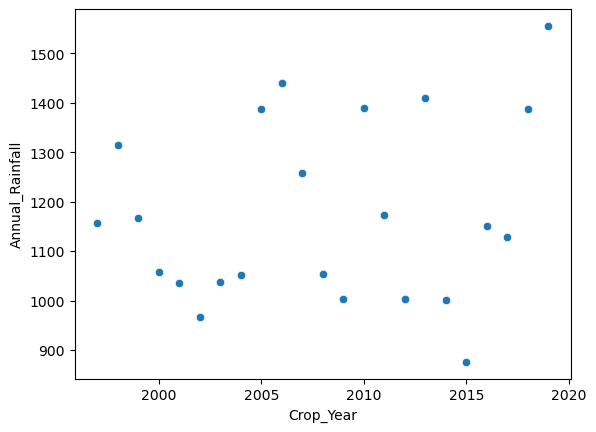

In [11]:
sns.scatterplot(x = data['Crop_Year'], y = data['Annual_Rainfall'])
plt.show

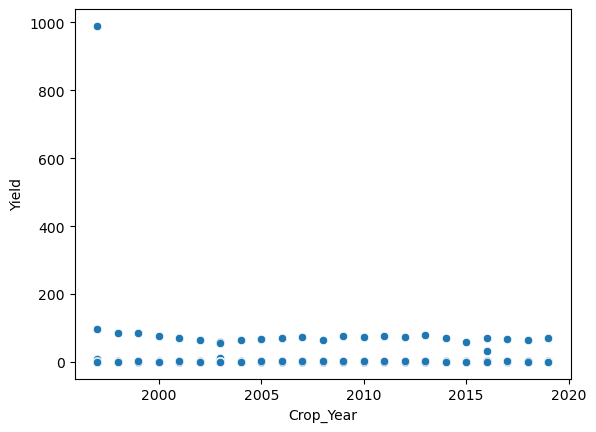

In [12]:
sns.scatterplot(x = data['Crop_Year'], y = data['Yield'])
plt.show()

# Year wise analysis of yield production

In [13]:
data_year = data[data['Crop_Year']!=2020]  # As the data of 2020 is incomplete

In [14]:
year_yield = data_year.groupby('Crop_Year').sum() 
year_yield

Area  Production  Annual_Rainfall    Fertilizer  \
Crop_Year                                                           
1997       12743172.00    11561799     20809.800000  1.212768e+09   
1998       19537200.00    65148800     43388.400000  1.930275e+09   
1999       20039169.00    71473153     38494.500000  2.126757e+09   
2000       19612100.00    63604510     33849.600000  1.925320e+09   
2001       18840200.00    61239800     34181.400000  1.924150e+09   
2002       18637100.00    58387990     31924.200000  1.764374e+09   
2003       18155422.00    47285560     35271.600000  1.797024e+09   
2004       19171200.00    40125600     36820.000000  2.077008e+09   
2005       19791000.00    57152030     45777.600000  2.373337e+09   
2006       21260800.00    87513600     47500.200000  2.715217e+09   
2007       21311700.00   115850200     41487.600000  2.842981e+09   
2008       19309700.00    79066700     34742.400000  2.762059e+09   
2009       20141800.00    84680210     33079.200000  3.138495e+09   
2010       26028500.00   118380550     45837.000000  4.323594e+09   
2011       19751400.00   113534720     38745.150015  3.308755e+09   
2012       19580920.00    98532770     33112.200000  2.952803e+09   
2013       21032600.00   112117742     46523.400000  3.039000e+09   
2014       20871800.00   108323500     33052.800000  3.150807e+09   
2015       20602673.00    83647680     32400.900000  3.253368e+09   
2016       22104068.00    87391535     43741.800000  3.387448e+09   
2017       22026162.50   107470785     42921.000000  3.467799e+09   
2018       20247622.65   111874637     51333.800000  3.284164e+09   
2019       21143243.00    94201044     60676.200000  3.631563e+09   

              Pesticide        Yield  
Crop_Year                             
1997       3.950383e+06  1107.750997  
1998       5.665788e+06   111.183158  
1999       5.410576e+06   112.314460  
2000       5.099146e+06    99.244584  
2001       4.898452e+06    96.125392  
2002       4.659275e+06    90.295890  
2003       4.357301e+06   150.912484  
2004       4.025952e+06    90.238380  
2005       4.156110e+06    93.290816  
2006       4.677376e+06    98.132616  
2007       3.409872e+06   107.209269  
2008       1.737873e+06    93.642321  
2009       3.424106e+06   102.849613  
2010       6.246840e+06   105.659477  
2011       6.517962e+06   106.636162  
2012       6.070085e+06   100.560580  
2013       5.678802e+06   110.333393  
2014       6.887694e+06    95.565114  
2015       6.798882e+06    83.056347  
2016       7.736424e+06   138.027850  
2017       8.369942e+06   100.110612  
2018       7.086668e+06    93.008331  
2019       7.823000e+06   102.645266

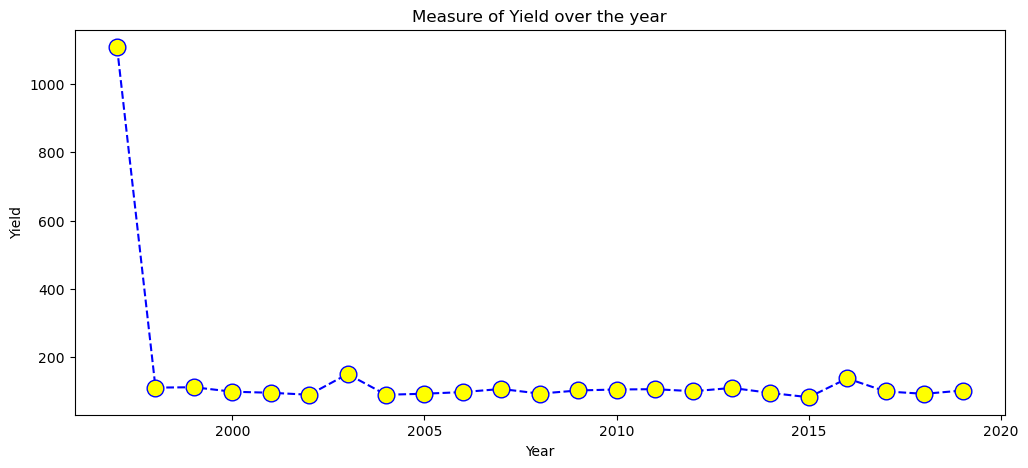

In [15]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

It can be observed that the yield has decreased over the year.Reasons can be climate change, decrease in soil fertility.

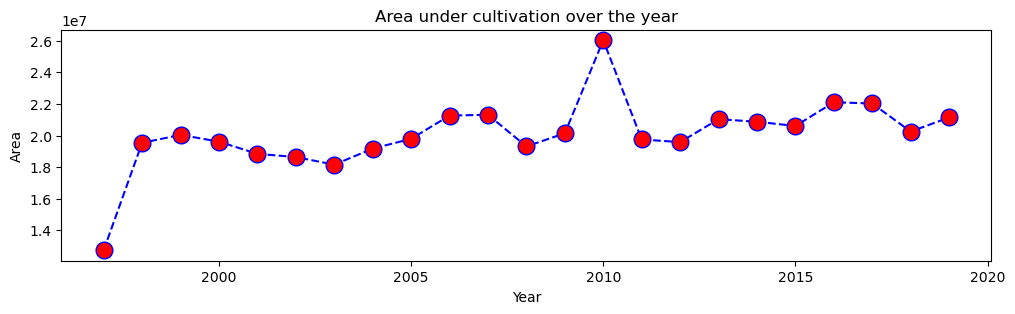

In [16]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

It can be observed that the area under cultivation almost constant but in year 2010 there are large area under cultivation.

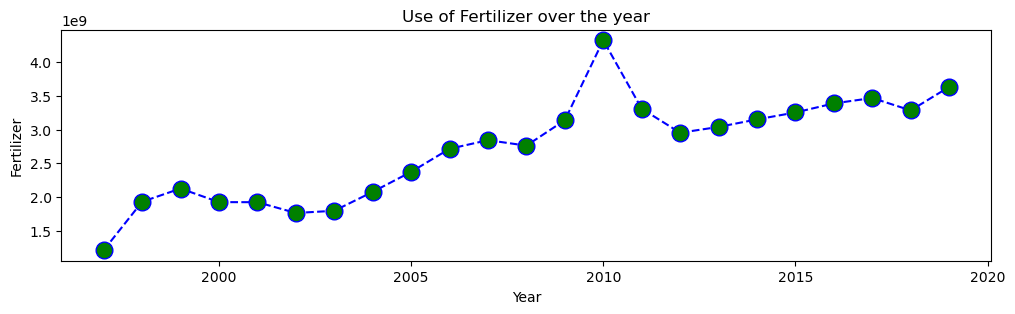

In [17]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='green')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

The use of Fertilizer in the fields is increasing.

# Season wise analysis of yield production

In [18]:
data_Seas = data[data['Season']!='Whole Year ']

data_season = data_Seas.groupby('Season').sum()
data_season

Crop_Year          Area  Production  Annual_Rainfall  \
Season                                                              
Autumn            1997  2.100000e+01       19695      1156.100000   
Kharif          775151  3.069149e+08   406123220    453345.422735   
Rabi            492023  1.349743e+08   110481599    287762.450005   
Summer          215064  3.349532e+06     5425615    127131.681820   

               Fertilizer     Pesticide       Yield  
Season                                               
Autumn       1.998570e+03  6.510000e+00  989.870000  
Kharif       4.134333e+10  8.317282e+07  391.598976  
Rabi         1.821930e+10  3.602513e+07  207.843851  
Summer       4.594779e+08  9.320533e+05  144.944587

In [19]:
data_season = data.groupby('Season').sum()
data_season

Crop_Year          Area  Production  Annual_Rainfall  \
Season                                                              
Autumn            1997  2.100000e+01       19695      1156.100000   
Kharif          775151  3.069149e+08   406123220    453345.422735   
Rabi            492023  1.349743e+08   110481599    287762.450005   
Summer          215064  3.349532e+06     5425615    127131.681820   
Whole Year       62304  1.670083e+07  1356514786     36275.095455   

               Fertilizer     Pesticide        Yield  
Season                                                
Autumn       1.998570e+03  6.510000e+00   989.870000  
Kharif       4.134333e+10  8.317282e+07   391.598976  
Rabi         1.821930e+10  3.602513e+07   207.843851  
Summer       4.594779e+08  9.320533e+05   144.944587  
Whole Year   2.366959e+09  4.558498e+06  1654.535695

In [20]:
fig = px.bar(data_season, y = 'Area', color=data_season.index, hover_data=['Area'],text = 'Area')
fig.show()

 - Area under cultivation in Kharif season is highest, second is Rabi season.
  - Crops in autumn, summer are not grown over large area

# Crop wise analysis of yield production

In [21]:
# Where the Yield is zero
data_yz = data[data['Yield']==0]
data_yz.shape

(0, 10)

In [22]:
data_ynz = data[data['Yield']>0]  # where yield is more than zero
data_crop = data_ynz.groupby('Crop').sum()
data_crop

Crop_Year         Area  Production  Annual_Rainfall  \
Crop                                                                       
Arhar/Tur                46184  26558259.00    19846220     27004.195455   
Bajra                    46184  26815484.40    19791471     27004.195455   
Banana                    2003     57700.00     3634720      1037.400000   
Castor seed              40165    254561.00       73947     23254.895455   
Cotton(lint)             46184  78908059.00   112725830     27004.195455   
Gram                     46184  28448729.00    22138728     27004.195455   
Groundnut                88374   8306581.00     9242109     51696.190910   
Jowar                    92368  93936438.00    72148950     54008.390910   
Linseed                  44187    969653.00      250081     25848.095455   
Maize                   136546  15612795.00    35732125     80073.486365   
Moong(Green Gram)        48199  12322496.00     5418811     27879.895455   
Niger seed               44187    867045.00      225659     25848.095455   
Onion                     2003    133622.00     1663240      1037.400000   
Other  Rabi pulses       46184   2612049.00     1130525     27004.195455   
Other Cereals            32214    563223.00      387443     20405.000000   
Other Kharif pulses      44187   3379470.00     1221850     25848.095455   
Other Summer Pulses       8070     19049.00        8308      5223.800000   
Ragi                     46184   2908564.00     2983925     27004.195455   
Rapeseed &Mustard        38145    179263.00       56299     22560.995455   
Rice                     92368  34801017.00    61238128     54008.390910   
Safflower                44187   3954612.00     2076241     25848.095455   
Sesamum                  96444   1646130.00      508769     56919.990910   
Small millets            70253   5870990.00     5480506     39494.690910   
Soyabean                 44187  58424954.00    63556003     25848.095455   
Sugarcane                46184  17184647.00  1396763558     27004.195455   
Sunflower               130543   4597374.00     2407732     76156.886365   
Tobacco                  14112      6671.00       10134      8510.900000   
Urad                     46184  10230364.00     4911887     27004.195455   
Wheat                    46184  22311279.75    32916852     27004.195455   
other oilseeds           18141     58473.00       14864     11124.200000   

                       Fertilizer     Pesticide        Yield  
Crop                                                          
Arhar/Tur            3.598304e+09  7.281679e+06    14.897315  
Bajra                3.356715e+09  7.009280e+06    14.519233  
Banana               5.711146e+06  1.384800e+04    57.568571  
Castor seed          3.311133e+07  6.675239e+04     6.294427  
Cotton(lint)         1.094427e+10  2.181986e+07   129.190806  
Gram                 4.003461e+09  7.992454e+06    16.238509  
Groundnut            1.083484e+09  2.183328e+06    49.145485  
Jowar                1.205341e+10  2.463590e+07    42.715115  
Linseed              1.175904e+08  2.388641e+05     6.331953  
Maize                2.256992e+09  4.428282e+06  1103.576351  
Moong(Green Gram)    1.574472e+09  3.249601e+06    11.355249  
Niger seed           1.077410e+08  2.158829e+05     5.750596  
Onion                1.322591e+07  3.206928e+04    12.448462  
Other  Rabi pulses   3.497241e+08  6.962961e+05     9.905826  
Other Cereals        7.771138e+07  1.809268e+05    10.270347  
Other Kharif pulses  4.185138e+08  8.712891e+05     7.942724  
Other Summer Pulses  3.181294e+06  6.985770e+03     1.939254  
Ragi                 3.748117e+08  7.656664e+05    23.499470  
Rapeseed &Mustard    2.335859e+07  4.718564e+04     6.650398  
Rice                 4.645950e+09  9.368500e+06    90.574122  
Safflower            4.843608e+08  9.624900e+05    11.942387  
Sesamum              2.001239e+08  4.125138e+05    46.986766  
Small millets        9.188566e+08  1.419119e+06    18.448056  
Soyabean     

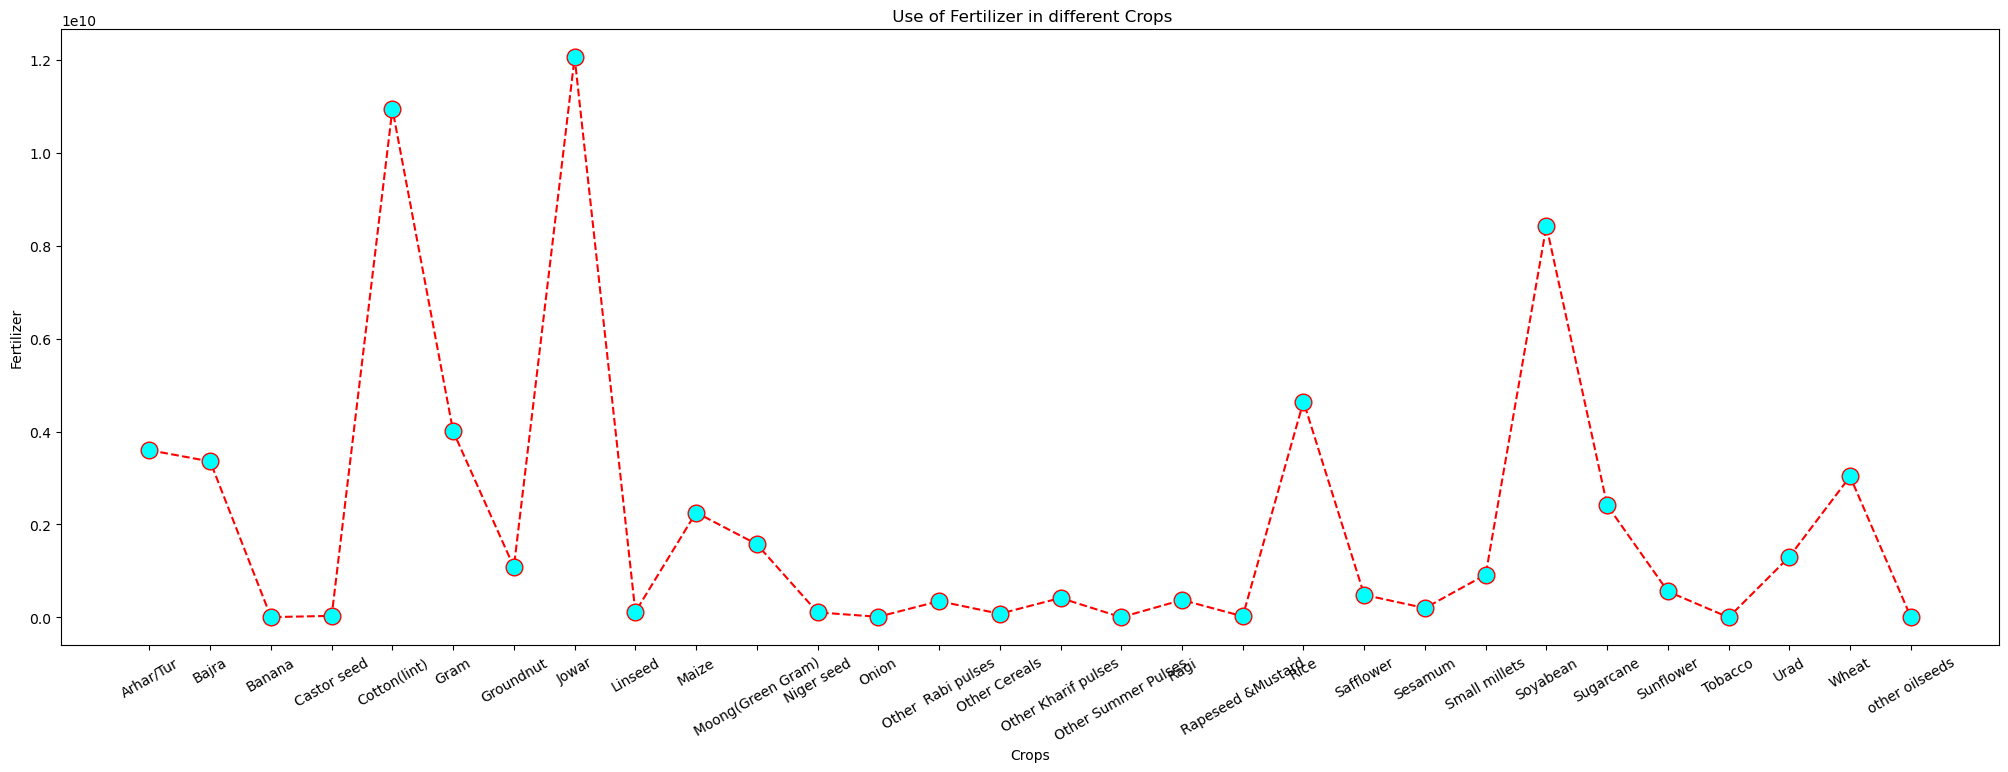

In [23]:
plt.figure(figsize = (25,8))
plt.plot(data_crop.index, data_crop['Fertilizer'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Crops')
plt.ylabel('Fertilizer')
plt.title(' Use of Fertilizer in different Crops')
plt.xticks(rotation=30)
plt.show()

 - The amount of Fertilizer used is maximum in Jawar Crop.
 - The second crop to use more fertilizer is Cotton crop

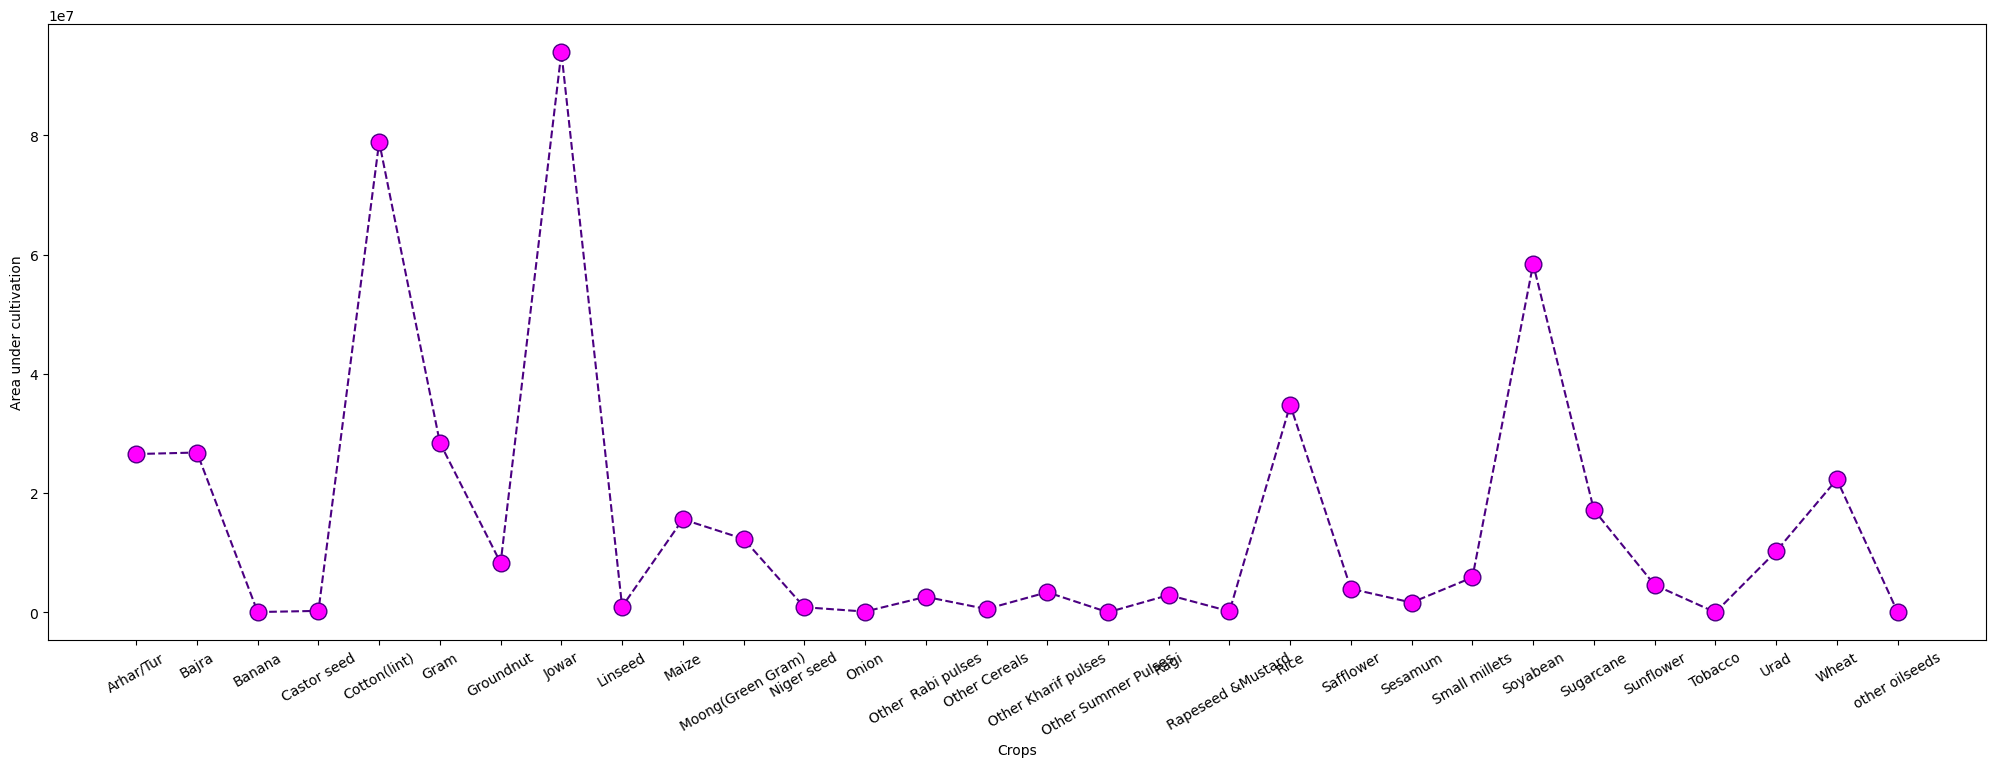

In [24]:
plt.figure(figsize = (25,8))
plt.plot(data_crop.index, data_crop['Area'],color='indigo', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='fuchsia')
plt.xlabel('Crops')
plt.ylabel('Area under cultivation')
plt.xticks(rotation=30)
plt.show()

Area under cultivation is larger for Jawar and Cotton crops

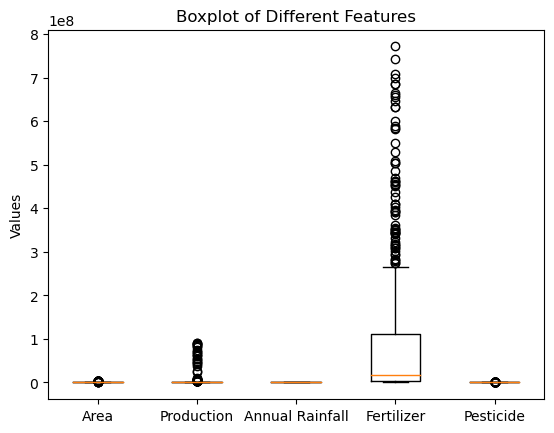

In [25]:
#checking outliers by boxplot
data_to_plot = [data['Area'].values, data['Production'].values, data['Annual_Rainfall'].values, data['Fertilizer'].values, data['Pesticide'].values]
# Creating a boxplot
plt.boxplot(data_to_plot, labels=['Area', 'Production', 'Annual Rainfall', 'Fertilizer','Pesticide'])
plt.ylabel('Values')
plt.title('Boxplot of Different Features')
plt.show()

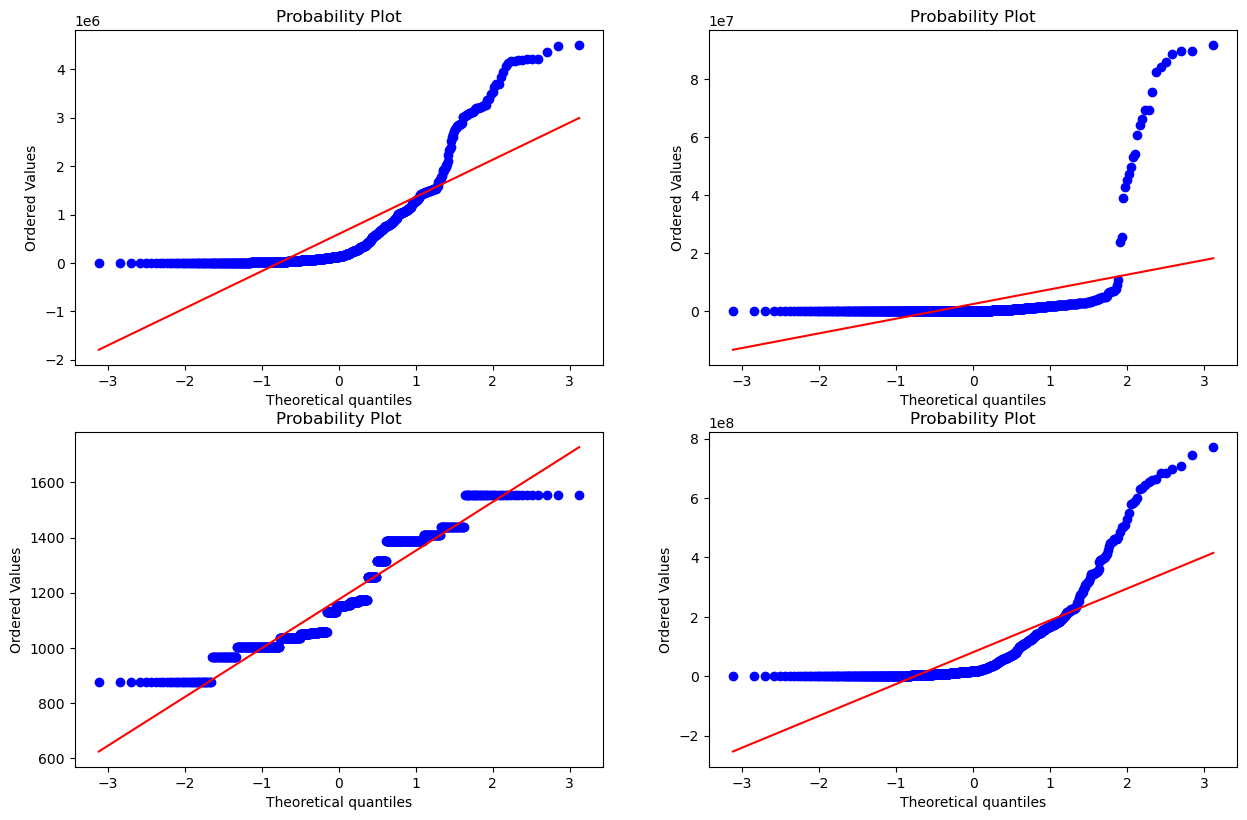

In [26]:
#creating a Q-Q plot 
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(data['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2,)
stats.probplot(data['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(data['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(data['Fertilizer'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)

plt.show()

In [27]:
data1 = pd.get_dummies(data, columns = category_columns, drop_first=True)

In [28]:
data1.head()

Crop_Year       Area  Production  Annual_Rainfall    Fertilizer  Pesticide  \
0       1997  1005600.0      348000           1156.1  9.570295e+07  311736.00   
1       1997  1671200.0     1119000           1156.1  1.590481e+08  518072.00   
2       1997    31292.0     1753100           1156.1  2.978060e+06    9700.52   
3       1997   717100.0      295900           1156.1  6.824641e+07  222301.00   
4       1997  2013200.0     2632300           1156.1  1.915962e+08  624092.00   

       Yield  Crop_Bajra  Crop_Banana  Crop_Castor seed  ...  Crop_Sugarcane  \
0   0.332500           0            0                 0  ...               0   
1   0.632273           1            0                 0  ...               0   
2  95.993913           0            0                 0  ...               0   
3   0.408148           0            0                 0  ...               0   
4   1.646800           0            0                 0  ...               0   

   Crop_Sunflower  Crop_Tobacco  Crop_Urad  Crop_Wheat  Crop_other oilseeds  \
0               0             0          0           0                    0   
1               0             0          0           0                    0   
2               0             0          0           0                    0   
3               0             0          0           0                    0   
4               0             0          0           0                    0   

   Season_Kharif       Season_Rabi         Season_Summer       \
0                   1                   0                   0   
1                   1                   0                   0   
2                   0                   0                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   Season_Whole Year   
0                   0  
1                   0  
2                   1  
3                   0  
4                   0  

[5 rows x 40 columns]

Rename the columns

In [29]:
d1=data1.rename(columns={"Crop_Castor seed":"Crop_Castor_seed"},inplace=True)
d1

In [30]:
d1=data1.rename(columns={"Crop_Cotton(lint)":"Crop_Cotton_lint"},inplace=True)
d1

In [31]:
d1=data1.rename(columns={"Crop_Moong(Green Gram)":"Crop_Moong_Green_Gram"},inplace=True)
d1

In [32]:
d1=data1.rename(columns={"Crop_Niger seed":"Crop_niger_seed"},inplace=True)
d1

In [33]:
d1=data1.rename(columns={"Crop_Other  Rabi pulses":"Crop_Other_Rabi_pulses"},inplace=True)
d1

In [34]:
d1=data1.rename(columns={"Crop_Other Cereals":"Crop_Other_Cereals"},inplace=True)
d1

In [35]:
d1=data1.rename(columns={"Crop_Other Kharif pulses":"Crop_Other_Kharif_pulses"},inplace=True)
d1

In [36]:
d1=data1.rename(columns={"Crop_Other Summer Pulses":"Crop_Other_Summer_Pulses"},inplace=True)
d1

In [37]:
d1=data1.rename(columns={"Crop_Rapeseed &Mustard":"Crop_Rapeseed_Mustard"},inplace=True)
d1

In [38]:
d1=data1.rename(columns={"Crop_Small millets":"Crop_small_millets"},inplace=True)
d1

In [39]:
d1=data1.rename(columns={"Crop_other oilseeds":"Crop_other_oilseeds"},inplace=True)
d1

In [40]:
d1=data1.rename(columns={"Season_Kharif     ":"Season_Kharif"},inplace=True)
d1

In [41]:
d1=data1.rename(columns={"Season_Rabi       ":"Season_Rabi"},inplace=True)
d1

In [42]:
d1=data1.rename(columns={"Season_Summer     ":"Season_Summer"},inplace=True)
d1

In [43]:
d1=data1.rename(columns={"Season_Whole Year ":"Season_Whole_Year"},inplace=True)
d1

In [44]:
data1

Crop_Year       Area  Production  Annual_Rainfall    Fertilizer  \
0         1997  1005600.0      348000           1156.1  9.570295e+07   
1         1997  1671200.0     1119000           1156.1  1.590481e+08   
2         1997    31292.0     1753100           1156.1  2.978060e+06   
3         1997   717100.0      295900           1156.1  6.824641e+07   
4         1997  2013200.0     2632300           1156.1  1.915962e+08   
..         ...        ...         ...              ...           ...   
765       2019   340529.0      151195           1555.8  5.848926e+07   
766       2019  1056965.0     1793440           1555.8  1.815443e+08   
767       2019    10634.0        3249           1555.8  1.826496e+06   
768       2019    10517.0        3231           1555.8  1.806400e+06   
769       2019     1276.0         686           1555.8  2.191658e+05   

     Pesticide      Yield  Crop_Bajra  Crop_Banana  Crop_Castor_seed  ...  \
0    311736.00   0.332500           0            0                 0  ...   
1    518072.00   0.632273           1            0                 0  ...   
2      9700.52  95.993913           0            0                 0  ...   
3    222301.00   0.408148           0            0                 0  ...   
4    624092.00   1.646800           0            0                 0  ...   
..         ...        ...         ...          ...               ...  ...   
765  125995.73   0.456250           0            0                 0  ...   
766  391077.05   1.564000           0            0                 0  ...   
767    3934.58   0.271364           0            0                 0  ...   
768    3891.29   0.379667           0            0                 0  ...   
769     472.12   0.362500           0            0                 0  ...   

     Crop_Sugarcane  Crop_Sunflower  Crop_Tobacco  Crop_Urad  Crop_Wheat  \
0                 0               0             0          0           0   
1                 0               0             0          0           0   
2                 0               0             0          0           0   
3                 0               0             0          0           0   
4                 0               0             0          0           0   
..              ...             ...           ...        ...         ...   
765               0               0             0          1           0   
766               0               0             0          0           1   
767               0               0             0          0           0   
768               0               0             0          0           0   
769               0               0             0          0           0   

     Crop_other_oilseeds  Season_Kharif  Season_Rabi  Season_Summer  \
0                      0              1            0              0   
1                      0              1            0              0   
2                      0              0            0              0   
3                      0              1            0              0   
4                      0              1            0              0   
..                   ...            ...          ...            ...   
765                    0              1            0              0   
766                    0              0            1              0   
767                    1              1            0              0   
768                    1              0            1              0   
769                    1              0            0              1   

     Season_Whole_Year  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
..                 ...  
765                  0  
766                  0  
767                  0  
768                  0  
769                  0  

[770 rows x 40 columns]

In [45]:
#spliting data in x and y
x = data1.drop(['Yield'], axis = 1)
y = data1[['Yield']]

In [46]:
print(x.shape)
y.shape

(770, 39)


(770, 1)

In [47]:
x.head()

Crop_Year       Area  Production  Annual_Rainfall    Fertilizer  Pesticide  \
0       1997  1005600.0      348000           1156.1  9.570295e+07  311736.00   
1       1997  1671200.0     1119000           1156.1  1.590481e+08  518072.00   
2       1997    31292.0     1753100           1156.1  2.978060e+06    9700.52   
3       1997   717100.0      295900           1156.1  6.824641e+07  222301.00   
4       1997  2013200.0     2632300           1156.1  1.915962e+08  624092.00   

   Crop_Bajra  Crop_Banana  Crop_Castor_seed  Crop_Cotton_lint  ...  \
0           0            0                 0                 0  ...   
1           1            0                 0                 0  ...   
2           0            0                 0                 1  ...   
3           0            0                 0                 0  ...   
4           0            0                 0                 0  ...   

   Crop_Sugarcane  Crop_Sunflower  Crop_Tobacco  Crop_Urad  Crop_Wheat  \
0               0               0             0          0           0   
1               0               0             0          0           0   
2               0               0             0          0           0   
3               0               0             0          0           0   
4               0               0             0          0           0   

   Crop_other_oilseeds  Season_Kharif  Season_Rabi  Season_Summer  \
0                    0              1            0              0   
1                    0              1            0              0   
2                    0              0            0              0   
3                    0              1            0              0   
4                    0              1            0              0   

   Season_Whole_Year  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0  

[5 rows x 39 columns]

In [48]:
y.head()

Yield
0   0.332500
1   0.632273
2  95.993913
3   0.408148
4   1.646800

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=42)

In [50]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((616, 39), (154, 39), (616, 1), (154, 1))

In [51]:
#by using transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

x_train_transform1 = pt.fit_transform(x_train)
x_test_transform1 = pt.fit_transform(x_test)
y_train_transform1 = pt.fit_transform(y_train)
y_test_transform1 = pt.fit_transform(y_test)


In [52]:
df_trans = pd.DataFrame(x_train_transform1, columns=x_train.columns)
df_trans.head()

Crop_Year      Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0  -1.431845 -0.238299   -0.482480         0.101330   -0.329180  -0.208729   
1   1.137045  0.180878    0.368323         0.014104    0.264940   0.341311   
2   0.977867  0.901811    0.825685        -2.017675    1.007125   1.036332   
3   1.297268 -0.987711   -0.941988        -0.111941   -0.918330  -0.833030   
4   1.620876  0.844111    2.438648         1.768480    0.996841   1.043281   

   Crop_Bajra  Crop_Banana  Crop_Castor_seed  Crop_Cotton_lint  ...  \
0   -0.183186    -0.040324         -0.152499         -0.178398  ...   
1   -0.183186    -0.040324         -0.152499         -0.178398  ...   
2   -0.183186    -0.040324         -0.152499         -0.178398  ...   
3   -0.183186    -0.040324         -0.152499         -0.178398  ...   
4   -0.183186    -0.040324         -0.152499         -0.178398  ...   

   Crop_Sugarcane  Crop_Sunflower  Crop_Tobacco  Crop_Urad  Crop_Wheat  \
0       -0.178398       -0.303642     -0.090462  -0.178398   -0.157982   
1       -0.178398       -0.303642     -0.090462  -0.178398   -0.157982   
2       -0.178398       -0.303642     -0.090462  -0.178398    6.329824   
3       -0.178398        3.293350     -0.090462  -0.178398   -0.157982   
4        5.605448       -0.303642     -0.090462  -0.178398   -0.157982   

   Crop_other_oilseeds  Season_Kharif  Season_Rabi  Season_Summer  \
0            -0.107211      -1.003252      1.46385      -0.405538   
1            -0.107211       0.996759     -0.68313      -0.405538   
2            -0.107211      -1.003252      1.46385      -0.405538   
3            -0.107211       0.996759     -0.68313      -0.405538   
4            -0.107211      -1.003252     -0.68313      -0.405538   

   Season_Whole_Year  
0          -0.196941  
1          -0.196941  
2          -0.196941  
3          -0.196941  
4           5.077658  

[5 rows x 39 columns]

In [53]:
df_trans2 = pd.DataFrame(y_train_transform1, columns=y_train.columns)
df_trans2.head()

Yield
0 -1.244332
1  0.395679
2  0.495801
3 -0.401872
4  2.528054

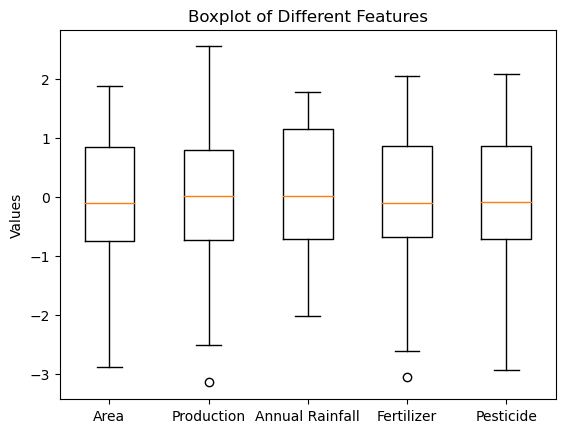

In [54]:
#after transforming the data checking outliers by boxplot
data_to_plot = [df_trans['Area'].values, df_trans['Production'].values, df_trans['Annual_Rainfall'].values, df_trans['Fertilizer'].values, df_trans['Pesticide'].values]
# Creating a boxplot
plt.boxplot(data_to_plot, labels=['Area', 'Production', 'Annual Rainfall', 'Fertilizer','Pesticide'])
plt.ylabel('Values')
plt.title('Boxplot of Different Features')
plt.show()

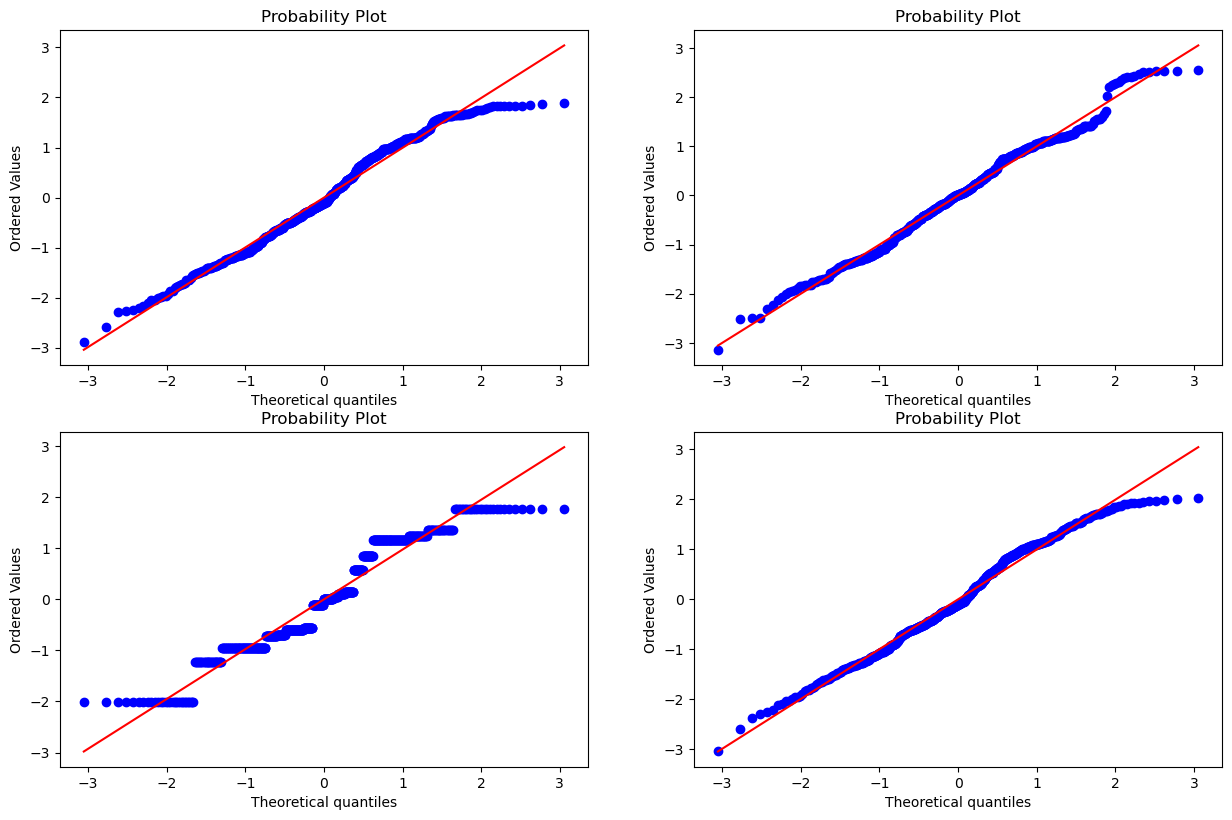

In [55]:
#after transforming the data creating a Q-Q plot 
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df_trans['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2,)
stats.probplot(df_trans['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df_trans['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df_trans['Fertilizer'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)

plt.show()

# Model Fitting

# Linear Regression

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, accuracy_score

In [57]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(x_train, y_train)

LinearRegression()

# Before transforming the data 

In [60]:
y_pred_test = lr.predict(x_test)
print("Test Accuracy : ",r2_score(y_test,y_pred_test))

y_pred=lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Test Accuracy :  0.7199252042245605
Mean Squared Error: 51.66746894620255


# After transforming the data

Test Accuracy :  0.8784327691936614
Mean Squared Error: 0.12156723080633855


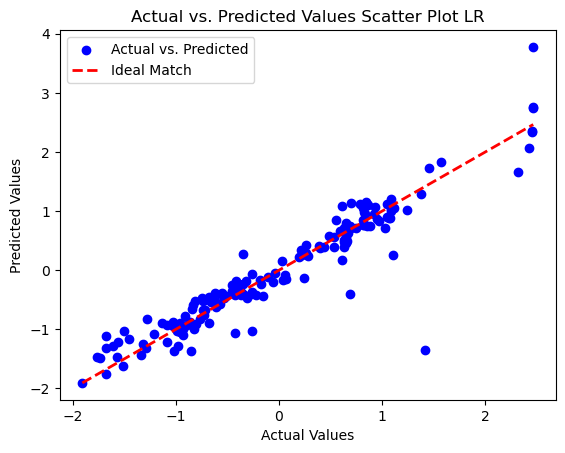

In [61]:
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(x_train_transform1,y_train_transform1)

y_pred_test = lr.predict(x_test_transform1)
print("Test Accuracy : ",r2_score(y_test_transform1,y_pred_test))
y_pred=lr.predict(x_test_transform1)
mse = mean_squared_error(y_test_transform1, y_pred)
print(f'Mean Squared Error: {mse}')

 #Plotting the scatter plot
plt.scatter(y_test_transform1, y_pred, color='blue', marker='o', label='Actual vs. Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test_transform1), max(y_test_transform1)], [min(y_test_transform1), max(y_test_transform1)], color='red', linestyle='--', linewidth=2, label='Ideal Match')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Scatter Plot LR')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Random forest regressor

R-squared: 0.8780312895880251
Mean Squared Error (MSE): 0.12196871041197486


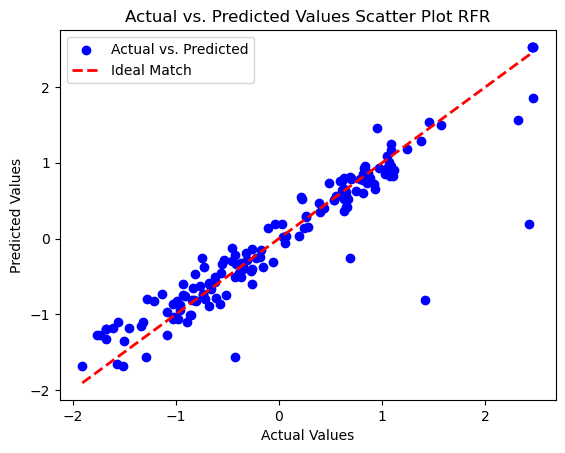

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_transform1, y_train_transform1)

# Make predictions on the test set
y_pred = rf_model.predict(x_test_transform1)

# Evaluate the model
mse = mean_squared_error(y_test_transform1, y_pred)
r_squared = r2_score(y_test_transform1, y_pred)

# Print results
print(f"R-squared: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")
 #Plotting the scatter plot
plt.scatter(y_test_transform1, y_pred, color='blue', marker='o', label='Actual vs. Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test_transform1), max(y_test_transform1)], [min(y_test_transform1), max(y_test_transform1)], color='red', linestyle='--', linewidth=2, label='Ideal Match')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Scatter Plot RFR')

# Display the legend
plt.legend()

# Show the plot
plt.show()


# Support Vector Regressor

Mean Squared Error (MSE): 0.12040332846014186
R-squared: 0.8795966715398581


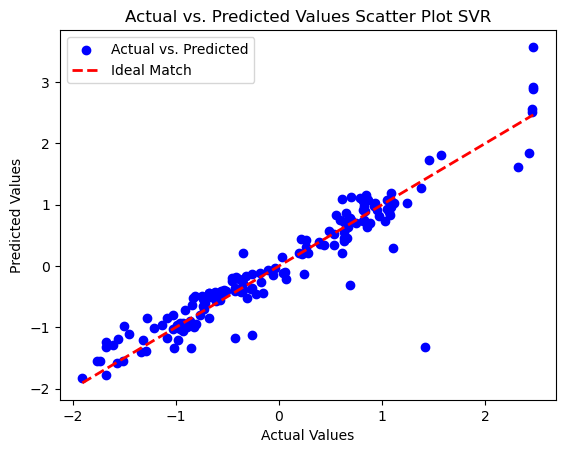

In [63]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Define and train the Support Vector Regression model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr_model.fit(x_train_transform1, y_train_transform1)

# Make predictions on the test set
y_pred = svr_model.predict(x_test_transform1)

# Evaluate the model
mse = mean_squared_error(y_test_transform1, y_pred)
r_squared = r2_score(y_test_transform1, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")

 #Plotting the scatter plot
plt.scatter(y_test_transform1, y_pred, color='blue', marker='o', label='Actual vs. Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test_transform1), max(y_test_transform1)], [min(y_test_transform1), max(y_test_transform1)], color='red', linestyle='--', linewidth=2, label='Ideal Match')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Scatter Plot SVR')

# Display the legend
plt.legend()

# Show the plot
plt.show()



# Lasso Regression

Testing Accuracy: 0.865268149809441
Testing MSE: 0.134731850190559


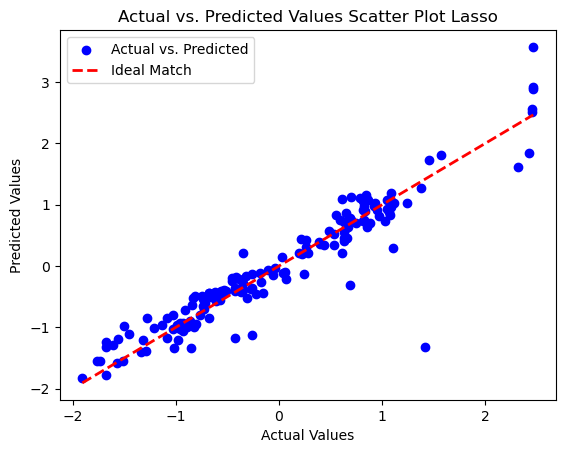

In [64]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Assuming you have your data and target variables X and y
# X and y should be numpy arrays or pandas dataframes

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
alpha = 0.01  # You can adjust the alpha parameter for regularization strength
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(x_train_transform1, y_train_transform1)


# Make predictions on the testing set
test_predictions = lasso_model.predict(x_test_transform1)


# Calculate testing accuracy
test_accuracy = 1 - mean_squared_error(y_test_transform1, test_predictions) / np.var(y_test_transform1)

# Calculate mean squared error for testing sets

test_mse = mean_squared_error(y_test_transform1, test_predictions)


print(f"Testing Accuracy: {test_accuracy}")

print(f"Testing MSE: {test_mse}")

 #Plotting the scatter plot
plt.scatter(y_test_transform1, y_pred, color='blue', marker='o', label='Actual vs. Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test_transform1), max(y_test_transform1)], [min(y_test_transform1), max(y_test_transform1)], color='red', linestyle='--', linewidth=2, label='Ideal Match')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Scatter Plot Lasso')

# Display the legend
plt.legend()

# Show the plot
plt.show()



# Ridge Regression

Mean Squared Error (MSE): 0.11760937999449038
R-squared: 0.8823906200055096


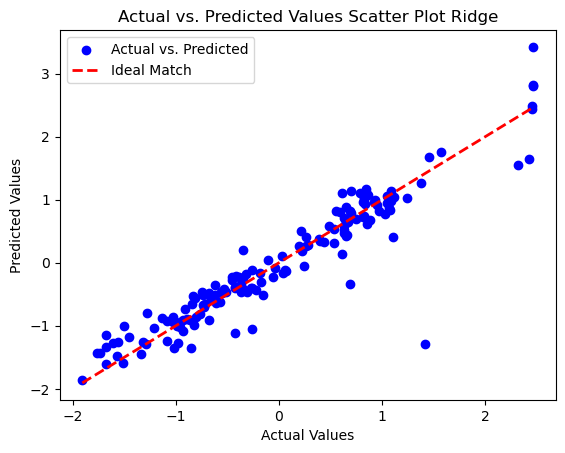

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Define and train the Ridge Regression model
alpha = 1.0  # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(x_train_transform1, y_train_transform1)

# Make predictions on the test set
y_pred = ridge_model.predict(x_test_transform1)

# Evaluate the model
mse = mean_squared_error(y_test_transform1, y_pred)
r_squared = r2_score(y_test_transform1, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r_squared}")

# Note: Since the target variable is continuous, there is no test accuracy or ROC curve in this context.

# Plot predicted vs. actual values
# Plotting the scatter plot
plt.scatter(y_test_transform1, y_pred, color='blue', marker='o', label='Actual vs. Predicted')

# Adding a diagonal line for reference
plt.plot([min(y_test_transform1), max(y_test_transform1)], [min(y_test_transform1), max(y_test_transform1)], color='red', linestyle='--', linewidth=2, label='Ideal Match')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Scatter Plot Ridge')

# Display the legend
plt.legend()

# Show the plot
plt.show()


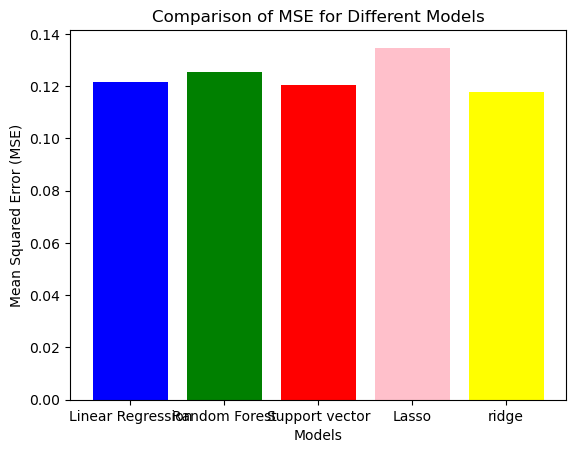

In [66]:
# Initialize different models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
alpha = 0.01 # You can adjust the alpha parameter for regularization streng
lasso_model = Lasso(alpha=alpha)
alpha = 1.0 # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
# Train the models
linear_model.fit(x_train_transform1, y_train_transform1)
random_forest_model.fit(x_train_transform1, y_train_transform1)
svr_model.fit(x_train_transform1, y_train_transform1)
lasso_model.fit(x_train_transform1, y_train_transform1)
ridge_model.fit(x_train_transform1, y_train_transform1)
# Make predictions
linear_predictions = linear_model.predict(x_test_transform1)
random_forest_predictions = random_forest_model.predict(x_test_transform1)
support_vector_predictions = svr_model.predict(x_test_transform1)
lasso_predictions = lasso_model.predict(x_test_transform1)
ridge_predictions = ridge_model.predict(x_test_transform1)
# Calculate MSE for each model
linear_mse = mean_squared_error(y_test_transform1, linear_predictions)
random_forest_mse = mean_squared_error(y_test_transform1, random_forest_predictions)
support_vector_mse = mean_squared_error(y_test_transform1,support_vector_predictions)
lasso_mse = mean_squared_error(y_test_transform1, lasso_predictions)
ridge_mse = mean_squared_error(y_test_transform1,ridge_predictions )
# Plotting the MSE values
models = ['Linear Regression', 'Random Forest','Support vector','Lasso','ridge']
mse_values = [linear_mse, random_forest_mse,support_vector_mse,lasso_mse ,ridge_mse]
plt.bar(models, mse_values, color=['blue', 'green', 'red','pink','yellow'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Different Models')
plt.show()


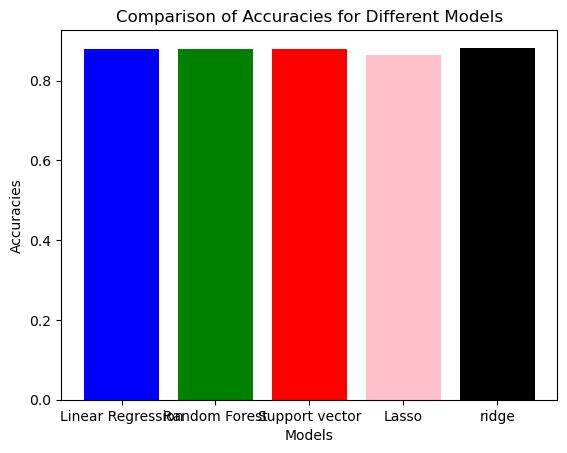

In [67]:
# Initialize different models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
alpha = 0.01 # You can adjust the alpha parameter for regularization streng
lasso_model = Lasso(alpha=alpha)
alpha = 1.0 # Regularization strength (adjust as needed)
ridge_model = Ridge(alpha=alpha)
# Train the models
linear_model.fit(x_train_transform1, y_train_transform1)
random_forest_model.fit(x_train_transform1, y_train_transform1)
svr_model.fit(x_train_transform1, y_train_transform1)
lasso_model.fit(x_train_transform1, y_train_transform1)
ridge_model.fit(x_train_transform1, y_train_transform1)
# Make predictions
linear_predictions = linear_model.predict(x_test_transform1)
random_forest_predictions = random_forest_model.predict(x_test_transform1)
support_vector_predictions = svr_model.predict(x_test_transform1)
lasso_predictions = lasso_model.predict(x_test_transform1)
ridge_predictions = ridge_model.predict(x_test_transform1)
# Calculate MSE for each model
linear_accuracy = r2_score(y_test_transform1, linear_predictions)
random_forest_accuracy = r2_score(y_test_transform1, random_forest_predictions)
support_vector_accuracy = r2_score(y_test_transform1,support_vector_predictions)
lasso_accuracy = r2_score(y_test_transform1, lasso_predictions)
ridge_accuracy = r2_score(y_test_transform1,ridge_predictions )
# Plotting the MSE values
models = ['Linear Regression', 'Random Forest','Support vector','Lasso','ridge']
mse_values = [linear_accuracy, random_forest_accuracy,support_vector_accuracy,lasso_accuracy ,ridge_accuracy]
plt.bar(models, mse_values, color=['blue', 'green', 'red','pink','black'])
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Comparison of Accuracies for Different Models')
plt.show()


# Conclusion: Ridge Regression is best fit to our data which has maximum accuracy and less MSE.